# **Weather Time Series Prediction**
![](https://i.pinimg.com/originals/e1/70/03/e17003d3a86823bea8a48e4ec03d33e9.gif)



**About Dataset**

Jena Climate is weather timeseries dataset recorded at the Weather Station of the Max Planck Institute for Biogeochemistry in Jena, Germany.

**Content**

Jena Climate dataset is made up of 14 different quantities (such air temperature, atmospheric pressure, humidity, wind direction, and so on) were recorded every 10 minutes, over several years. This dataset covers data from January 1st 2009 to December 31st 2016.

**Link:** [Dataset](https://www.kaggle.com/datasets/mnassrib/jena-climate)

## 1. Import and Visulize Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('jena_climate_2009_2016.csv')

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
                           
display(df)

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
0         996.52     -8.02    265.40        -8.90   93.30          3.33   
1         996.57     -8.41    265.01        -9.28   93.40          3.23   
2         996.53     -8.51    264.91        -9.31   93.90          3.21   
3         996.51     -8.31    265.12        -9.07   94.20          3.26   
4         996.51     -8.27    265.15        -9.04   94.10          3.27   
...          ...       ...       ...          ...     ...           ...   
420546   1000.07     -4.05    269.10        -8.13   73.10          4.52   
420547    999.93     -3.35    269.81        -8.06   69.71          4.77   
420548    999.82     -3.16    270.01        -8.21   67.91          4.84   
420549    999.81     -4.23    268.94        -8.53   71.80          4.46   
420550    999.82     -4.82    268.36        -8.42   75.70          4.27   

        VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0               3.11          0.22       1.94             3.12       1307.75   
1               3.02          0.21       1.89             3.03       1309.80   
2               3.01          0.20       1.88             3.02       1310.24   
3               3.07          0.19       1.92             3.08       1309.19   
4               3.08          0.19       1.92             3.09       1309.00   
...              ...           ...        ...              ...           ...   
420546          3.30          1.22       2.06             3.30       1292.98   
420547          3.32          1.44       2.07             3.32       1289.44   
420548          3.28          1.55       2.05             3.28       1288.39   
420549          3.20          1.26       1.99             3.20       1293.56   
420550          3.23          1.04       2.01             3.23       1296.38   

        wv (m/s)  max. wv (m/s)  wd (deg)  
0           1.03           1.75     152.3  
1           0.72           1.50     136.1  
2           0.19           0.63     171.6  
3           0.34           0.50     198.0  
4           0.32           0.63     214.3  
...          ...            ...       ...  
420546      0.67           1.52     240.0  
420547      1.14           1.92     234.3  
420548      1.08           2.00     215.2  
420549      1.49           2.16     225.8  
420550      1.23           1.96     184.9  

[420551 rows x 14 columns]

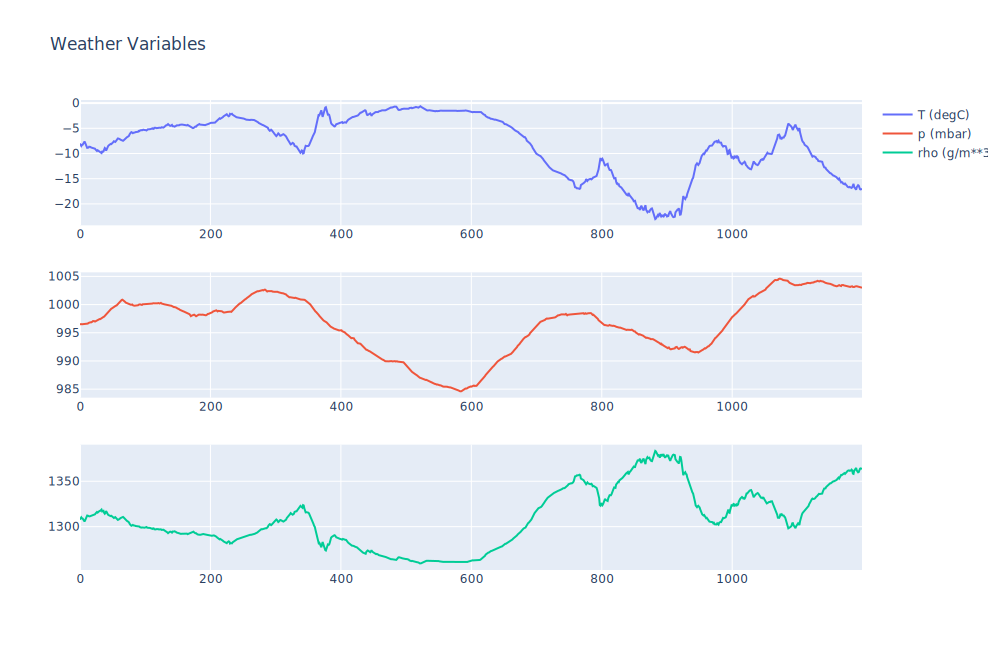

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Create subplots
fig = make_subplots(rows=3, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=df.index[:1200], y=df['T (degC)'], name='T (degC)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index[:1200], y=df['p (mbar)'], name='p (mbar)'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index[:1200], y=df['rho (g/m**3)'], name='rho (g/m**3)'), row=3, col=1)
fig.update_layout(title_text='Weather Variables', width=1000,  height=650)
fig.show(renderer="svg")

## 2. Clean and Transform Data

In [7]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

❗ Wind speed have -9999 min values, replace with 0.0

In [9]:
df['wv (m/s)'] = df['wv (m/s)'].replace(-9999.0, 0)
df['max. wv (m/s)'] = df['max. wv (m/s)'].replace(-9999.0, 0)

print(df['max. wv (m/s)'].min())
print(df['wv (m/s)'].min())

0.0
0.0


❗ Wind direction ```wd(deg)``` is betwen 0º and 360º, we need to transform into a vector that represent the cyclical nature of the wind direction. Convernt to **Radians**

In [11]:
import numpy as np

wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

❗ Lets Transform the time to represent the periodicity in a Sin/Cos seconds space

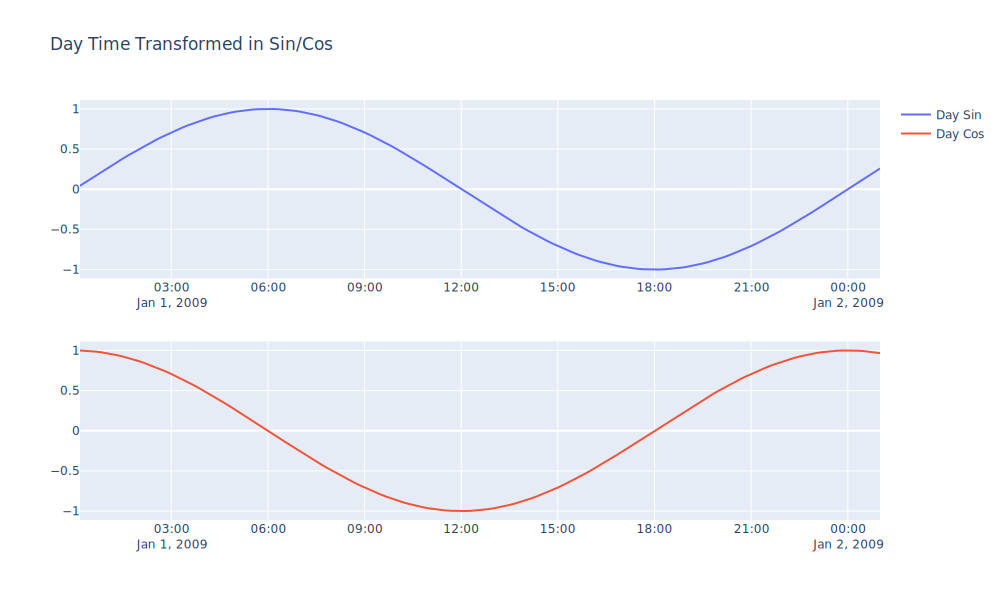

In [13]:
## Transform to seconds
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

# Transform to sin/cos
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))



fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=date_time[:150], y=df['Day sin'], name='Day Sin'), row=1, col=1)
fig.add_trace(go.Scatter(x=date_time[:150], y=df['Day cos'], name='Day Cos'), row=2, col=1)
fig.update_layout(title_text='Day Time Transformed in Sin/Cos', width=1000,  height=600)
fig.show(renderer="svg")

## 3. Split and Normalize Data

### 3.1 Split data without shuffle
* Train: 70%
* Test: 10% 
* Validation: 20%

In [15]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

print(f"Total Dataset:\t{df.values.shape}\nTrain Split:\t{train_df.shape}\nVal Split:\t{val_df.shape}\nTest Split:\t{test_df.shape}")

Total Dataset:	(420551, 19)
Train Split:	(294385, 19)
Val Split:	(84110, 19)
Test Split:	(42056, 19)


### 3.2 Normalization

In [17]:
# mean / std
train_mean = train_df.mean()
train_std = train_df.std()

# normalization
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std



In [18]:
c = ['hsl('+str(h)+',70%'+',70%)' for h in np.linspace(180, 360, 23)]

fig = go.Figure(data=[go.Violin(y=test_df[column],marker_color=c[i],  name = column,  meanline_visible=True) for i, column in enumerate(test_df)])
fig.update_layout(title_text='Normalized Variables Distribution', width=1100,  height=650)
fig.show(renderer="svg")

### 3.3 Data Windows
![Window Split](https://www.tensorflow.org/tutorials/structured_data/images/raw_window_24h.png?hl=es-419)



In [20]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
import numpy as np
import pandas as pd

def window_generator(df, input_width, label_width, features, label_columns, offset=0):
  """
  Creates windows of data from a DataFrame.

  Args:
    df: The input DataFrame.
    input_width: The number of time steps in the input window.
    label_width: The number of time steps in the label window.
    features: The features to include in the windows.

  Returns:
    A tuple of NumPy arrays containing input and label windows.
  """

  data = df[features].values
  labels = df[label_columns].values

  # Calculate the total window size
  total_window_size = input_width + offset + label_width

  # Create a list to hold the input and label windows
  x, y = [], []

  for i in range(len(data) - total_window_size + 1):
    input_window = data[i:i + input_width]
    label_window = labels[i + input_width :i + input_width + label_width]
    label_window = labels[i + input_width + offset:i + input_width + offset + label_width]
    x.append(input_window)
    y.append(label_window)

  return torch.tensor(np.array(x), dtype=torch.float32), torch.tensor(np.array(y), dtype=torch.float32)


## 4 Define Models
### 4.1 Convolutional neural network
![](https://www.tensorflow.org/tutorials/structured_data/images/wide_conv_window.png?hl=es-419)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from rich.progress import track


def train_model(model, X_train, y_train, criterion, optimizer,  val=None, batch_size=64, epochs=10, verbose=True):

    # Check if CUDA is available and use it if possible
    if torch.cuda.is_available():
        device = 'cuda'
        print(f'Using Cuda device: {torch.cuda.get_device_name(0)}')
    else:
        device = 'cpu'
        print('Using CPU device')


    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    train_loss_history = list()

    if val != None:
        x_val, y_val = val
        val_dataset = TensorDataset(x_val, y_val)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        val_loss_history = list()
    
    for epoch in track(range(epochs),'Training '+model.__class__.__name__):
        model.train()
        total_train_loss = 0
        for batch_inputs, batch_labels in train_loader:
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_inputs)
           
            loss = criterion(outputs, batch_labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_loss_history.append(avg_train_loss)
        
        # Validation phase
        if val != None:
            model.eval()
            total_val_loss = 0
            with torch.no_grad():
                for batch_inputs, batch_labels in val_loader:
                    batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
    
                    # Forward pass
                    outputs = model(batch_inputs)
                    loss = criterion(outputs, batch_labels)
                    total_val_loss += loss.item()
    
            avg_val_loss = total_val_loss / len(val_loader)
    
            if verbose:
                print(f'Epoch {epoch+1}/{epochs}, Train Loss {avg_train_loss:.4f}, Val Loss {avg_val_loss:.4f}')
            
            val_loss_history.append(avg_val_loss)

        else:
            if verbose:
                print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}')
        

    return train_loss_history, val_loss_history

In [24]:
def plot_loss(loss_data, title='Model'):
    epochs = list(range(1, len(loss_data[0])))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[0], mode='lines+markers', name='Train Loss', line_color="dodgerblue"))
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[1], mode='lines+markers', name='Validation Loss', line_color="violet"))
    
    fig.update_layout(title=f"{title} Loss", xaxis_title="Epoch", yaxis_title="MSE Loss", width=1000, height=500)
    fig.show(renderer="svg")

In [25]:
import matplotlib.pyplot as plt
# Evaluate the model on the test set
def predict(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

            # Forward pass
            outputs = model(batch_inputs)
            predictions.append(outputs.cpu().numpy())
            actuals.append(batch_labels.cpu().numpy())

    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    return predictions, actuals

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def denormalize(data, mean, std, feature=1):
    return data * std.iloc[feature] + mean.iloc[feature]

def calculate_error_metrics(predictions, actuals):
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predictions)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R^2': r2}

def evaluate(model, test_loader, display=True):

    predictions, actuals = predict(model, test_loader)
    
    denormalized_predictions = denormalize(predictions, train_mean, train_std)
    denormalized_actuals = denormalize(actuals, train_mean, train_std)

    error_metrics = calculate_error_metrics(denormalized_predictions, denormalized_actuals)
    
    if display:
        print(model.__class__.__name__+" Metrics:")
        for metric, value in error_metrics.items():
            print(f"{metric}: {value:.4f}")

    return error_metrics

In [27]:
def compare_metrics(metrics, name='MAE'):
    model_names = list(metrics.keys())
    mae_values = np.round([metrics[model][name] for model in model_names],3)
    
    # Define colors for each model
    colors = ['#6930c3', '#5e60ce', '#4ea8de', '#56cfe1', '#72efdd']
    
    # Create a Plotly bar chart
    fig = go.Figure(data=[go.Bar(x=model_names, y=mae_values, text=mae_values, textposition='auto', marker_color=colors)])

    # Customize the layout
    fig.update_layout(
        title=f"Comparison of {name} for Different Models",
        xaxis_title="Model",
        yaxis_title=name,
        template="plotly_white",
        width=1000, height=500,
    )
    fig.show()

In [149]:
import torch
import plotly.graph_objects as go
import numpy as np

def plot_forecast(window, model, true_label, feature=1, name='Model'):
    # Ensure the model is in evaluation mode
    model.eval()
    
    # No gradient calculation needed for inference
    with torch.no_grad():
        # Add a batch dimension and move the window to the device
        window = window.unsqueeze(0).to(device)
        # Get the model's prediction
        prediction = model(window).squeeze(0).cpu().numpy()

    # Convert the window to a NumPy array for plotting
    window_np = window.squeeze(0).cpu().numpy()
    
    # Ensure true_label is a NumPy array for easy plotting
    true_label = np.array(true_label)

    # Desnormalization
    window_np = denormalize(window_np, train_mean, train_std)
    true_label = denormalize(true_label, train_mean, train_std)
    prediction = denormalize(prediction, train_mean, train_std)
    
    # Create time steps for plotting
    time_steps = np.arange(window_np.shape[0])
    
    # Create the plot
    fig = go.Figure()

    # Plot each feature in the window
    fig.add_trace(go.Scatter(
        x=time_steps,
        y=window_np[:, feature],
        mode='lines+markers',
        line_color="#00a8e8",
        name=f'Feature {1 + feature}',
    ))
    
    # Plot each prediction value if it has multiple dimensions
    for i, pred_value in enumerate(prediction):
        fig.add_trace(go.Scatter(
            x=[time_steps[-1] + 1 + i],
            y=[pred_value],
            mode='markers',
            marker=dict(color='#d65654', size=10),
            marker_symbol='x',
            name=f'Prediction {i + 1}'
        ))

    # Plot each true label value if it has multiple dimensions
    for i, label_value in enumerate(true_label):
        fig.add_trace(go.Scatter(
            x=[time_steps[-1] + 1 + i],
            y=[label_value[0]],
            mode='markers',
            marker=dict(color='#76c893', size=5),
            name=f'True Label {i + 1}'
        ))

    # Update layout
    fig.update_layout(
        title=f"{name} Time Window Forecasting",
        xaxis_title="Time Step",
        yaxis_title="T (degC) Value",
        width=1000,
        height=500,
        legend_title="Legend",
        template="plotly_white",
        xaxis=dict(
            tickvals=list(range(window_np.shape[0])) + [window_np.shape[0] + i for i in range(len(prediction))],
            ticktext=[f"t-{i+1}" for i in range(window_np.shape[0])] + [f"Pred {i+1}" for i in range(len(prediction))]
        )
    )

    fig.show()

## Models

In [80]:
import torch
import torch.nn as nn

class DenseModel(nn.Module ):
    def __init__(self,window_size ,output_size = 1):
        super(DenseModel, self).__init__()
        self.flatten = nn.Flatten()
        self.output_size = output_size
        self.fc1 = nn.Linear(window_size * 19, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, self.output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DenseCovModel(nn.Module):
    def __init__(self, input_channels=19,window_size=24, conv_out_channels=64, kernel_size=17, output_size=1):
        super(DenseCovModel, self).__init__()
        self.output_size = output_size
        
        # Capa convolucional
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=conv_out_channels, kernel_size=kernel_size)
        
        # Cálculo del tamaño de salida después de la capa convolucional
        conv_output_size = (window_size - kernel_size + 1) * conv_out_channels  # Secuencia 24, menos kernel_size -1 por padding cero
        
        # Capas densas
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(conv_output_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, self.output_size)
        
        # Función de activación
        self.relu = nn.ReLU()

    def forward(self, x):
        # Cambiar la dimensión de entrada para que sea compatible con Conv1d
        # Input x tiene forma (batch_size, 24, 19), debe cambiar a (batch_size, 19, 24)
        x = x.permute(0, 2, 1)  # Cambia la forma para que sea compatible con Conv1d

        # Aplicar la capa convolucional
        x = self.relu(self.conv1(x))  # Salida de Conv1d será (batch_size, conv_out_channels, nueva_longitud)
        
        # Aplanar y pasar a través de las capas densas
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


class LSTMModel(nn.Module):
    def __init__(self, input_size=19, hidden_size=64, num_layers=2, output_size=1, sequence_length=24):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, sequence_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = out[:, -1, :]  # Get the output from the last time step
        
        # Pass through fully connected layers
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out



class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attention_weights_layer = nn.Linear(hidden_size, 1, bias=False)
        
    def forward(self, lstm_out):
        # lstm_out shape: (batch_size, seq_length, hidden_size)
        attention_scores = self.attention_weights_layer(lstm_out)
        attention_weights = torch.softmax(attention_scores, dim=1)
        # context vector is the weighted sum of LSTM outputs
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)
        return context_vector, attention_weights

# Attention-Based LSTM model
class AttentionLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(AttentionLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.attention = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        lstm_out, _ = self.lstm(x, (h0, c0))
        context_vector, attention_weights = self.attention(lstm_out)
        out = self.fc(context_vector)
        return out

## Train

In [83]:
WINDOW_SIZE = 34
LABEL_SIZE = 12
OFFSET = 0
FEATURES = test_df.columns
LABEL_COLUMN = ['T (degC)']


X_train, y_train = window_generator(train_df, WINDOW_SIZE, LABEL_SIZE, FEATURES, LABEL_COLUMN, OFFSET)
X_val, y_val = window_generator(val_df, WINDOW_SIZE, LABEL_SIZE, FEATURES, LABEL_COLUMN,  OFFSET)
X_test, y_test = window_generator(test_df, WINDOW_SIZE, LABEL_SIZE, FEATURES, LABEL_COLUMN, OFFSET)

print(f'Original Dataframe: {test_df.shape}')
print('Shapes: (batch, input_window, features)')
print(f'Inputs shape: {X_train.shape}')
print(f'Labels shape: {y_train.shape}')

Original Dataframe: (42056, 19)
Shapes: (batch, input_window, features)
Inputs shape: torch.Size([294340, 34, 19])
Labels shape: torch.Size([294340, 12, 1])


In [84]:
X_train = X_train.to(device)
y_train = y_train.squeeze(-1).to(device)
X_val = X_val.to(device)
y_val = y_val.squeeze(-1).to(device)

In [85]:
models = {
    'Dense Model': DenseModel(window_size=WINDOW_SIZE,output_size=LABEL_SIZE).to(device),
    'Conv Model': DenseCovModel(output_size=LABEL_SIZE, window_size=WINDOW_SIZE).to(device),
    'LSTM Model': LSTMModel(input_size=19, hidden_size=32, num_layers=1, output_size=LABEL_SIZE, sequence_length=WINDOW_SIZE).to(device),
    'GRU Model': GRUModel(input_size=19, hidden_size=32, num_layers=1, output_size=LABEL_SIZE).to(device),
    'Attention LSTM Model': AttentionLSTMModel(input_size=19, hidden_size=40, num_layers=2, output_size=LABEL_SIZE).to(device)
}

lr = 0.0001
batch_size = 32
epochs = 16
criterion = nn.MSELoss()        
optimizers = [optim.Adam(model.parameters(), lr=lr) for _, model in models.items()]

In [89]:
loss_history = dict()
for (name, model), opti in zip(models.items(), optimizers):
    loss_history[name] = train_model(model, X_train, y_train, criterion, opti, val=(X_val, y_val),  batch_size=batch_size, epochs=epochs, verbose=False)

Output()

Using Cuda device: NVIDIA GeForce RTX 3060 Laptop GPU


Output()

Using Cuda device: NVIDIA GeForce RTX 3060 Laptop GPU


Output()

Using Cuda device: NVIDIA GeForce RTX 3060 Laptop GPU


Output()

Using Cuda device: NVIDIA GeForce RTX 3060 Laptop GPU


Output()

Using Cuda device: NVIDIA GeForce RTX 3060 Laptop GPU


## Evaluation

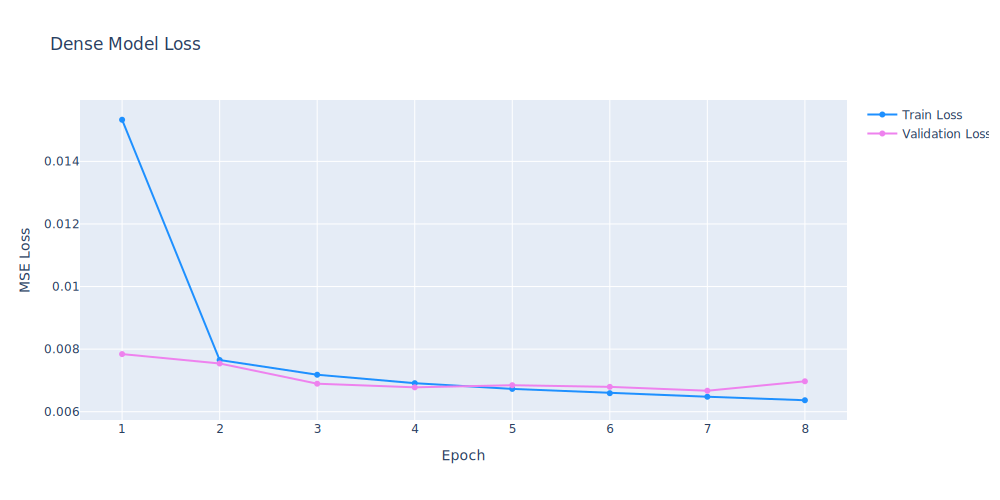

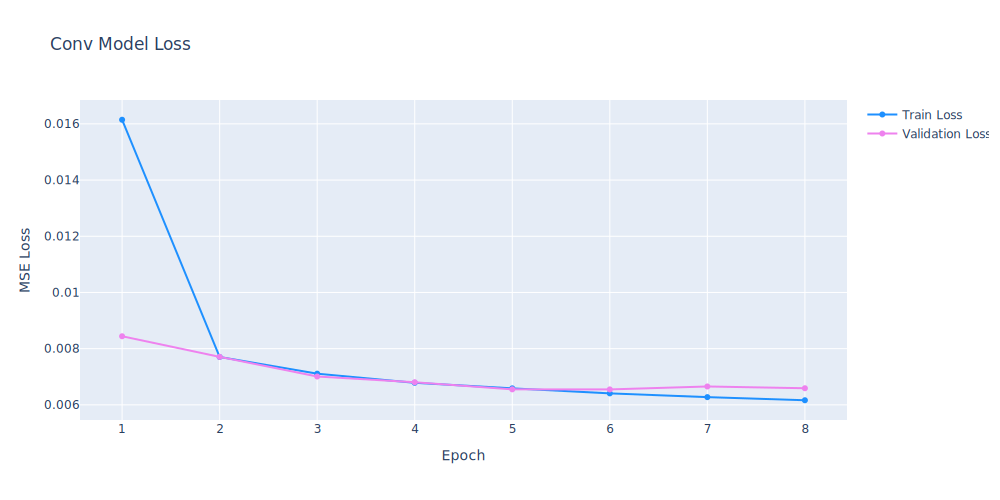

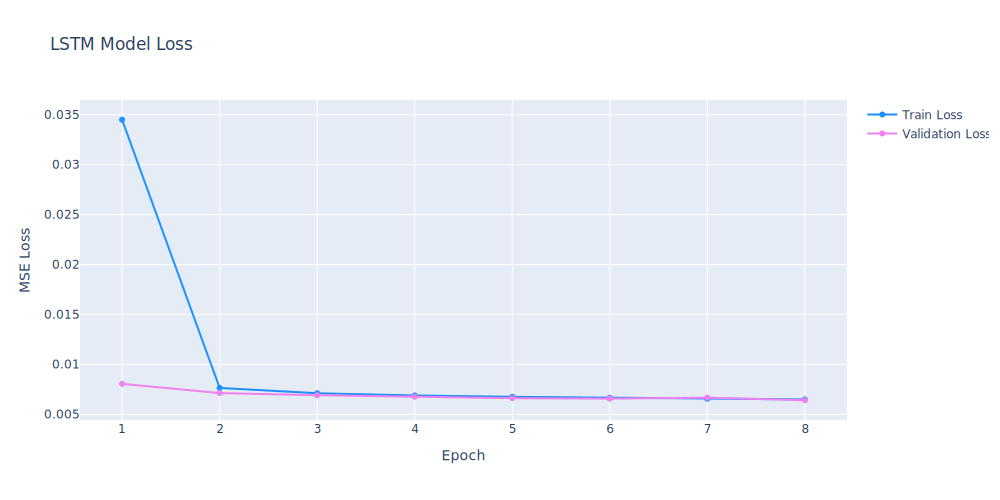

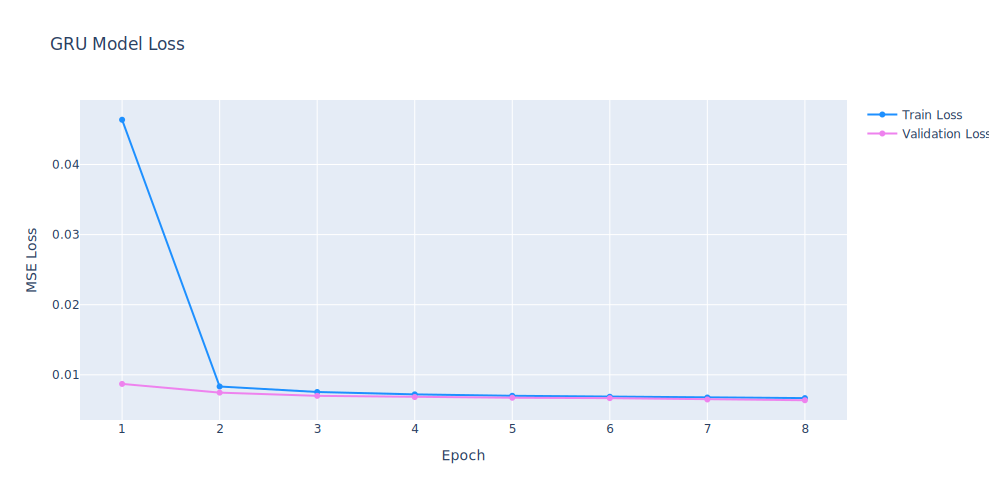

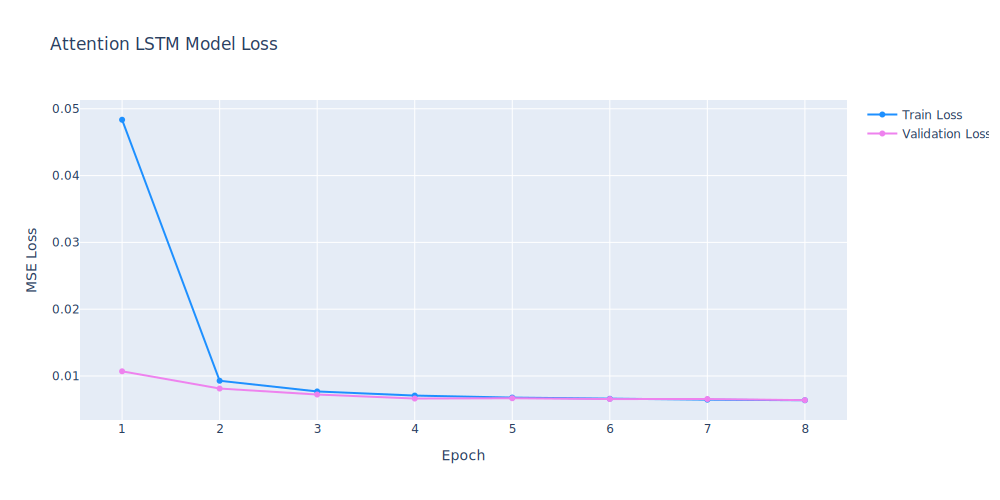

In [90]:
for name, loss in loss_history.items():
    plot_loss(loss, name)

In [91]:
test_dataset = TensorDataset(X_test, y_test.squeeze(-1))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

metrics = dict()
for name, model in models.items():
    metrics[model.__class__.__name__] = evaluate(model, test_loader, display=False)

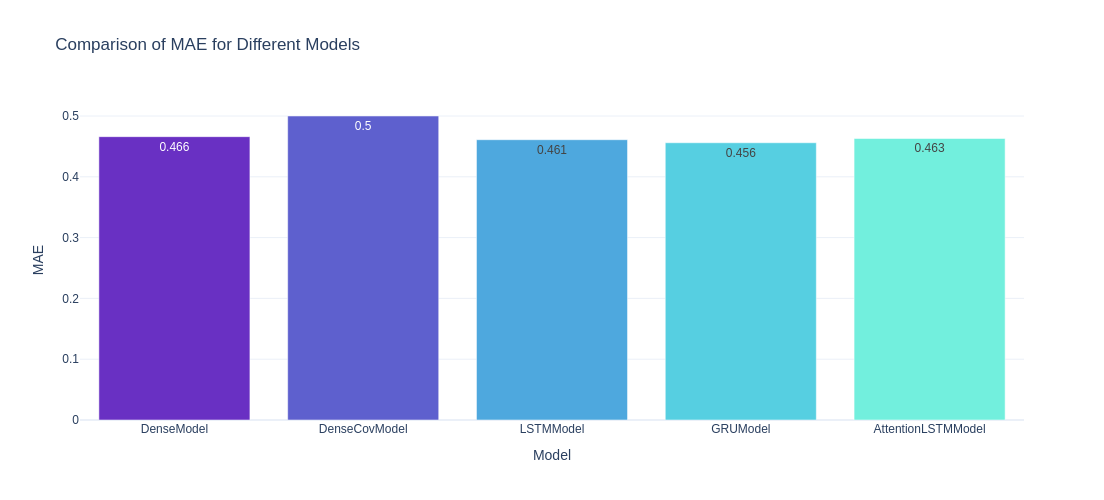

In [92]:
compare_metrics(metrics,'MAE')

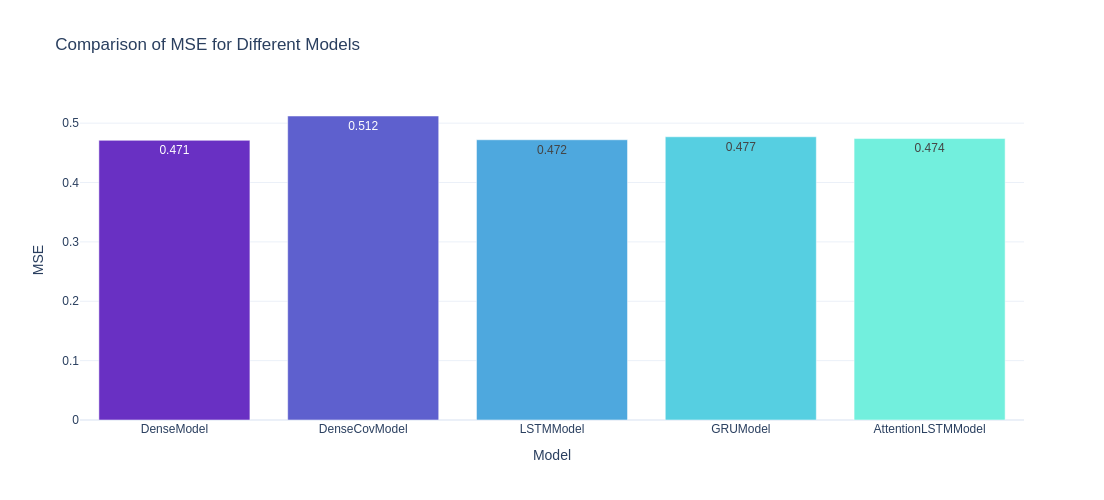

In [93]:
compare_metrics(metrics,'MSE')

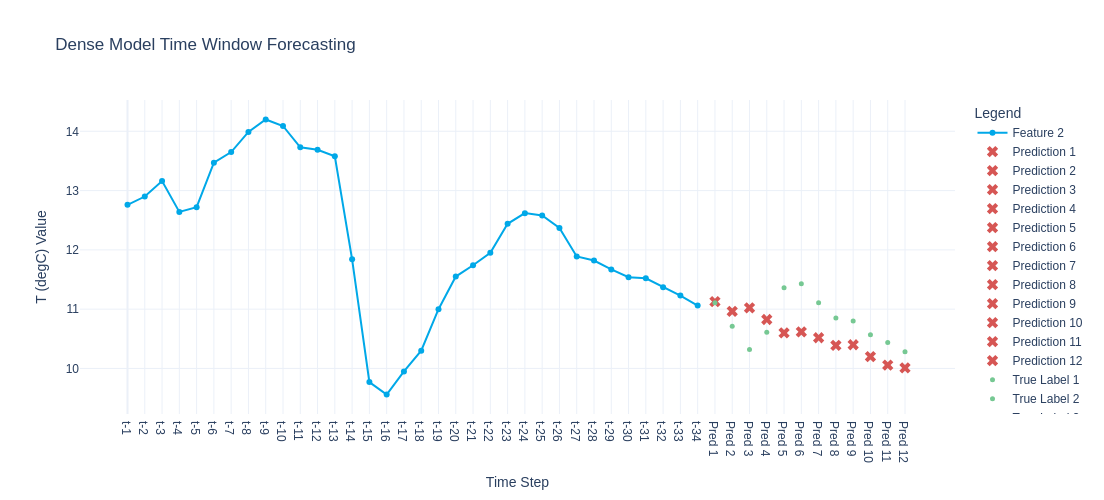

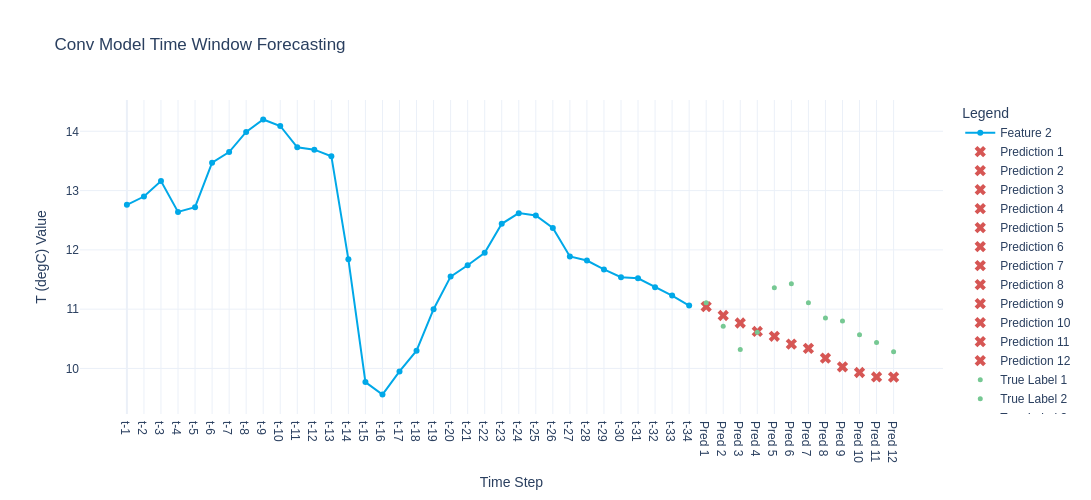

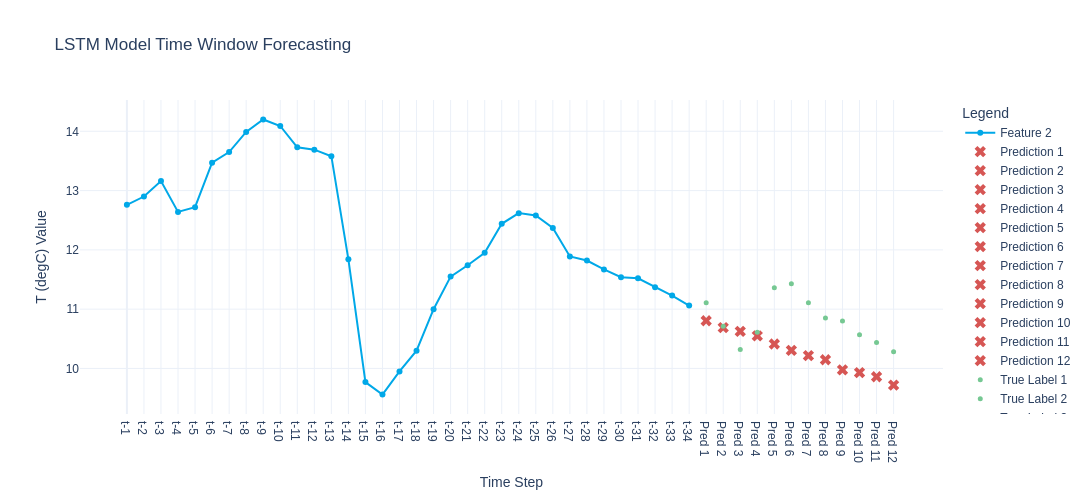

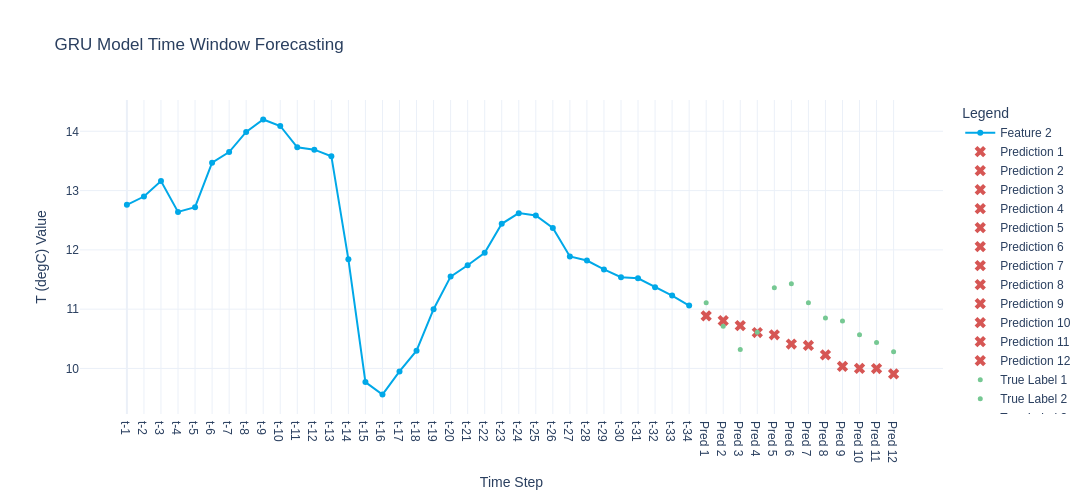

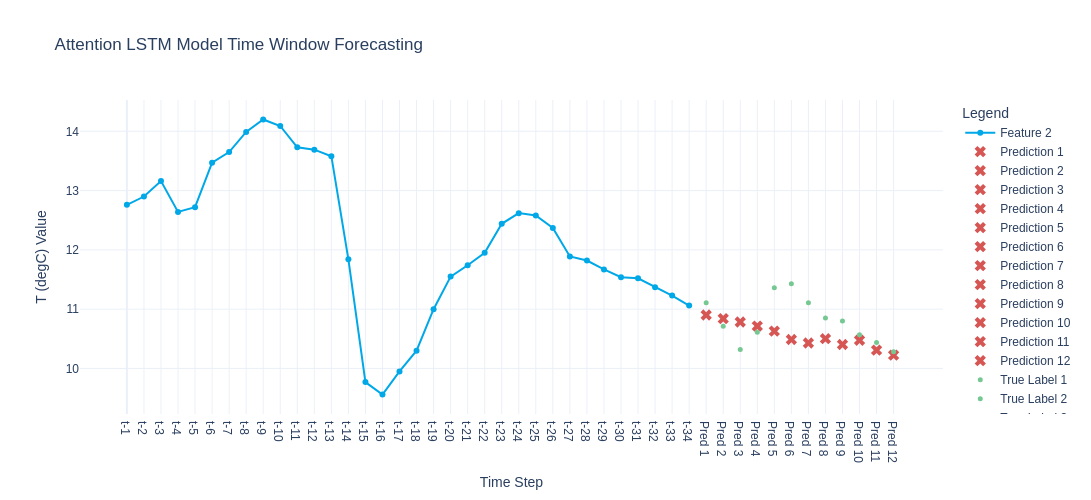

In [151]:
window = 5000

sample_window = X_test[window]
true_label = y_test[window]

for name, model in models.items():
    plot_forecast(sample_window, model, true_label, name = name)